<a href="https://colab.research.google.com/github/chitra-psg/lending-club/blob/master/customer_loan_profile_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lending Club - Exploratory Data Analysis**

<b><p> This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default.</p></b>


<a href="https://colab.research.google.com/github/chitra-psg/lending-club/blob/master/customer_loan_profile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Import the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [72]:
# Configurations
import warnings
warnings.filterwarnings('ignore')
#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#2 decimal places
pd.options.display.float_format = '{:.2f}'.format
# The dataset has many columns and the list is getting truncated in the output. Hence, adjusting the configuration
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
#chart style
sns.set_style('darkgrid')

In [73]:
# Load the source data from GitHub into dataframe for analysis
# Load all column data in and then determine data type : low_memory=False
df_loan = pd.read_csv("https://github.com/chitra-psg/lending-club/blob/master/data/loan.csv?raw=True", low_memory=False)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data Cleansing

***Filtering rows required for the analysis***

In [74]:
# For the current exercise to identify attributes realted to Defaulters, we wont need Current loans so dropping
print("No. of rows before dropping Current loan = ", df_loan.shape[0])
# Loan status Current is still in progressed so will exclude
df_loan = df_loan[df_loan['loan_status'] != 'Current']
print("No. of rows after dropping Current loan = ", df_loan.shape[0])

No. of rows before dropping Current loan =  39717
No. of rows after dropping Current loan =  38577


***Filtering columns required for the analysis***

Data has too many columns. We will shortlist columns based on the data availability in the columns and then perform analysis of the data to shortlist attributes further for our analysis

In [75]:
# Dropping Columns not useful for Analysis

# Case 1 : Drop columns with less than 50% values
print('No. of columns after drop = ', len(df_loan.columns))
df_loan=df_loan.dropna(how='any', axis=1, thresh=df_loan.shape[0]*0.5)
print('No. of columns with more 50% values = ', len(df_loan.columns))

# Case 2 : Drop columns with just 1 non NULL values as
distinct_value = df_loan.nunique()
df_loan.drop(distinct_value[ distinct_value == 1 ].index, axis=1, inplace=True)
print('No. of columns with more than one non NULL value =  ', len(df_loan.columns))

# Case 3 : Remove columns that are redundant or not useful for the use case we are analysing

# Customer  information that are understood to be not direclty related for the current analysis
# id , member_id, desc , url, zip_code ,title 

# Loan details that are understood to be not direclty related for the current analysis
# delinq_2yrs, earliest_cr_line, loan_amnt,inq_last_6mths, open_acc,pub_rec,revol_bal,total_acc,out_prncp, funded_amnt
# out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries
# collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d

ls_columns_to_be_dropped = ['id','member_id', 'desc', 'url', 'zip_code', 'title', 'delinq_2yrs', 'earliest_cr_line', 'loan_amnt',
                            'inq_last_6mths', 'open_acc','pub_rec','revol_bal','total_acc', 'funded_amnt','total_pymnt','total_pymnt_inv',
                            'total_rec_prncp','total_rec_int','total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d',
                            'last_pymnt_amnt','last_credit_pull_d']

df_loan.drop(ls_columns_to_be_dropped, axis=1, inplace=True)

print('No. of columns after removal of columns not required for the analysis =  ', len(df_loan.columns))

No. of columns after drop =  111
No. of columns with more 50% values =  54
No. of columns with more than one non NULL value =   43
No. of columns after removal of columns not required for the analysis =   18


***Standardising Values***

In [76]:
# issue_d data is available in MMM-YY format. Extract year and Month as separate columns
df_loan['issue_month'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y').dt.month.astype(int)
df_loan['issue_year'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y').dt.year.astype(int)

#Standardizing values in the below columns by extracting only  numeric characters

# It has % in the interest rate. % symbol will be removed
df_loan['int_rate'] = df_loan['int_rate'].str.extract('(\d+)', expand=False).astype(float)
df_loan['revol_util'] = df_loan['revol_util'].str.extract('(\d+)', expand=False).astype(float)

#Term has values like 36 months and 60 months. This will give 36 and 60 as output
df_loan['term'] = df_loan['term'].str.extract('(\d+)', expand=False).astype(int)

# Emp length has <1 year, 10+ years, 3 years type of values. We will treat <1 as 1 and 10+ as 10 for the analysis
df_loan['emp_length'] = df_loan['emp_length'].fillna('0').str.extract('(\d+)', expand=False).astype(int)

#Convert Object type to String Type
for col in df_loan.select_dtypes(include="object").columns:
    df_loan[col] = df_loan[col].astype("string")

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       38577 non-null  float64
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  string 
 5   sub_grade             38577 non-null  string 
 6   emp_title             36191 non-null  string 
 7   emp_length            38577 non-null  int64  
 8   home_ownership        38577 non-null  string 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  string 
 11  issue_d               38577 non-null  string 
 12  loan_status           38577 non-null  string 
 13  purpose               38577 non-null  string 
 14  addr_state            38577 non-null  string 
 15  dti                

**Identifying Outliers**



In [77]:
df_loan.describe()
# Observation 
# Observed few outlier customers who fall under high annual income.

,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,revol_util,pub_rec_bankruptcies,issue_month,issue_year
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38527.00,37880.00,38577.00,38577.00
mean,10222.48,41.90,11.36,322.47,4.93,68777.97,13.27,48.26,0.04,7.11,2010.31
std,7022.72,10.33,3.73,208.64,3.45,64218.68,6.67,28.34,0.20,3.41,0.88
min,0.00,36.00,5.00,15.69,0.00,4000.00,0.00,0.00,0.00,1.00,2007.00
25%,5000.00,36.00,8.00,165.74,2.00,40000.00,8.13,25.00,0.00,4.00,2010.00
50%,8733.44,36.00,11.00,277.86,4.00,58868.00,13.37,49.00,0.00,7.00,2011.00
75%,14000.00,36.00,14.00,425.55,9.00,82000.00,18.56,72.00,0.00,10.00,2011.00
max,35000.00,60.00,24.00,1305.19,10.00,6000000.00,29.99,99.00,2.00,12.00,2011.00


##### Identifying Outliers for the annual_inc column 

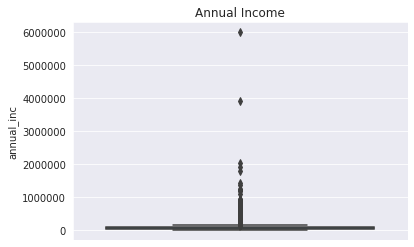

In [78]:
sns.boxplot( y="annual_inc", data=df_loan)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Annual Income")
plt.show()
#Observation
# there are outliers in the at 6000000 , 5000000 etc. 


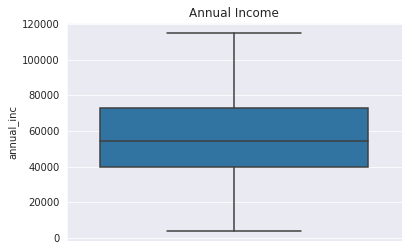

Percentage of people dropped after removing outlier : 3854


In [79]:
# Identify applicants with more than 90% salary and remove them for the current analysis
p_90  = df_loan.annual_inc.quantile(0.90)
df_normalised_loan = df_loan[~(df_loan['annual_inc'] >= p_90)]
sns.boxplot( y="annual_inc",data= df_normalised_loan)
plt.title("Annual Income")
plt.show()
print(r"Percentage of people dropped after removing outlier :",df_loan[df_loan.annual_inc > p_90].shape[0])

##### Binning the int_rate (interest rate) to find the spread 

In [80]:
# create bins for int_rate range
rate_bins = [0, 7.5, 10, 12.5, 15, 100]
rate_bucket = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
df_normalised_loan['int_rate_range'] = pd.cut(df_normalised_loan['int_rate'].astype(int), rate_bins, labels=rate_bucket)
df_normalised_loan['int_rate_range'].value_counts()

12.5-15    8178
7.5-10     7515
0-7.5      7287
10-12.5    6915
15+        4682
Name: int_rate_range, dtype: int64

##### Binning the funded_amnt_inv to find the spread 

In [81]:
# create bins for Loan funded by investor range
loan_amt_bins = [0, 5000,8000,13000,70000]
loan_amt_bucket = ['Less than 5K', '5K to 8K', '8K to 13K', '13K +']
df_normalised_loan['loan_amt_range'] = pd.cut(df_normalised_loan['funded_amnt_inv'].astype(int), loan_amt_bins, labels=loan_amt_bucket)
df_normalised_loan['loan_amt_range'].value_counts()

Less than 5K    10071
8K to 13K        8589
13K +            8495
5K to 8K         7281
Name: loan_amt_range, dtype: int64

##### Binning the dti (debt to income) to find the spread 

In [82]:
# create bins for dti range
dti_bin = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
dti_bucket = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
df_normalised_loan['dti_range'] = pd.cut(df_normalised_loan['dti'], dti_bin, labels=dti_bucket)
df_normalised_loan['dti_range'].value_counts()

10-15%    8611
15-20%    8125
5-10%     6701
20-25%    6238
0-5%      4296
25%+       606
Name: dti_range, dtype: int64

##### Segmenting the addr_state to region 

In [83]:
# Identify region based on the state code given in the map https://www.mappr.co/political-maps/us-regions-map/
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
northeast = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
southwest = ['AZ', 'TX', 'NM', 'OK']
southeast = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
midwest = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']

def map_regions(state):
    if state in west:
        return 'West'
    elif state in southwest:
        return 'SouthWest'
    elif state in southeast:
        return 'SouthEast'
    elif state in midwest:
        return 'MidWest'
    elif state in northeast:
        return 'NorthEast'
        
df_normalised_loan['region'] = df_normalised_loan['addr_state'].apply(map_regions)

In [84]:
print('Attibutes for analysis are -', df_normalised_loan.columns)

Attibutes for analysis are - Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_util', 'pub_rec_bankruptcies',
       'issue_month', 'issue_year', 'int_rate_range', 'loan_amt_range',
       'dti_range', 'region'],
      dtype='object')


**Univariate and Bivariate Analysis**

In [85]:
## Common Function to plot the countplot
def PlotAttribute(df_data, attribute, title, xlabel, ylabel, hueattribute = None, order = None):  
  if ( hueattribute ):
    chrt = sns.countplot(x=attribute,hue=hueattribute, data=df_data, order=order)
  else:
    chrt = sns.countplot(x=attribute,data=df_data)
  chrt.set_title(title,fontsize=14)
  chrt.set_xlabel(xlabel,fontsize=14)
  chrt.set_ylabel(ylabel,fontsize=14) 

  # To show count of values above bars
  for patch in chrt.patches:
      x, y = patch.get_xy()   # Bottom-left corner. 
      x += patch.get_width()/2 # Middle of the width.
      y += patch.get_height()  # Top of the bar
      color = patch.get_facecolor()
      chrt.text(x, y, str(y))
  return chrt

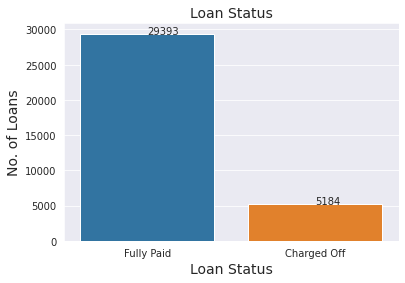

In [86]:
#Analysis on Loan Status
# Here we are comparing the number of charged off vs fully paid loans. and understand how much is percentage of the loans were charged off.
plt.figure(figsize= (6,4))
PlotAttribute(df_normalised_loan, 'loan_status', 'Loan Status', 'Loan Status', 'No. of Loans')
plt.show()

# Observation
# 14.9 % loans were charged off

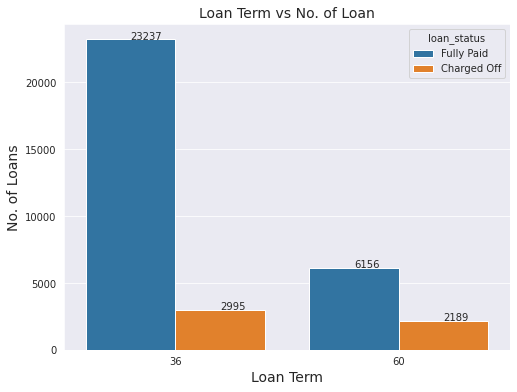

In [87]:
#Analysis on Loan Term
#Here we are trying to draw the relationship between the Term & loan_status. We are checking whether Term is a factor for default ( charge off) in loan.
plt.figure(figsize= (8,6))
PlotAttribute(df_normalised_loan, 'term', 'Loan Term vs No. of Loan', 'Loan Term', 'No. of Loans', 'loan_status')
plt.show()

# Observation
# Significant no. of loans were issued with 36 months term
# Ratio of default is higher in 60 months term

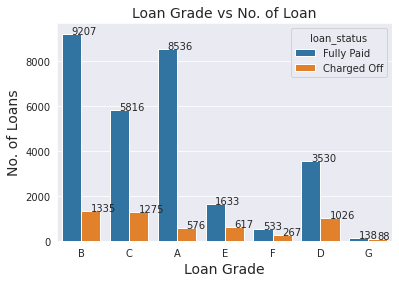

In [90]:
# Analysis on grade by Status
# Similarly , Here we are trying to identify how Loan Grade affect the loan_status. Which contribute more to the default loans ?

PlotAttribute(df_normalised_loan, 'grade', 'Loan Grade vs No. of Loan', 'Loan Grade', 'No. of Loans','loan_status')
plt.show()
# Observation
# Loans falling under Grade B, C and D have higher charged off

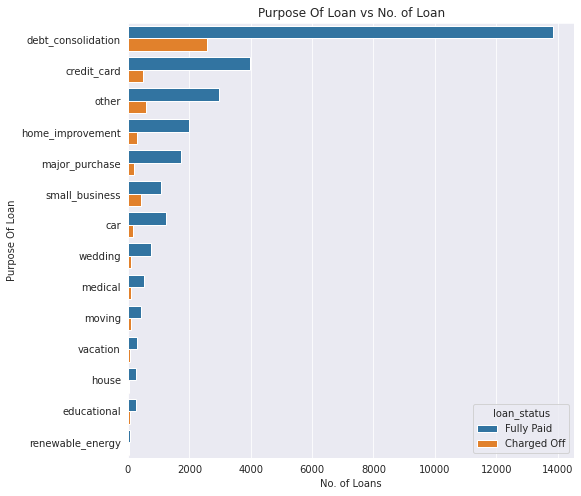

In [91]:
# Analysis on Loan Purpose by Status
# Here we are checking does people with particular purpose try to default loan more often than other. 

plt.figure(figsize= (8,8))
chrt = sns.countplot(y="purpose", data=df_normalised_loan, hue='loan_status' , order = df_normalised_loan['purpose'].value_counts().index)
chrt.set_title('Purpose Of Loan vs No. of Loan')
chrt.set_ylabel('Purpose Of Loan')
chrt.set_xlabel('No. of Loans')      
plt.show()

# Obervation
# Debt Consolidation, Credit Card and Other are the top 3 purpose behind the loans that were charged off.

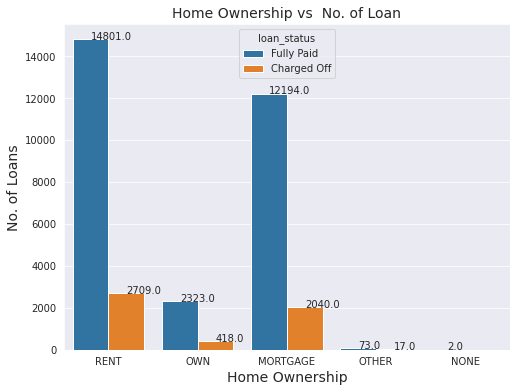

In [88]:
#  Analysis on home ownership by Status
#Here we are trying to identify how home ownership affect the laon_status. Does it contribute to default in loan?

plt.figure(figsize= (8,6))
PlotAttribute(df_normalised_loan, 'home_ownership','Home Ownership vs  No. of Loan', 'Home Ownership', 'No. of Loans', 'loan_status')
plt.show()

# Observation
# Applicants who fall under MORTGAGE and RENT have higher charged off  loans comapred to OWN

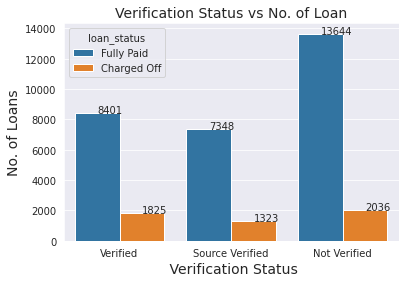

In [89]:
#Analysis on Annual Income Verification Status
#Here we are trying to check how verification_status affect the loan_status. Does it unverified people contribute to default in loan?

PlotAttribute(df_normalised_loan, 'verification_status', 'Verification Status vs No. of Loan', ' Verification Status', 'No. of Loans','loan_status')
plt.show()

# Observation
# It doesnt look like Unverified has significantly higher defaulters comapred the verified ones.

<Figure size 864x576 with 0 Axes>

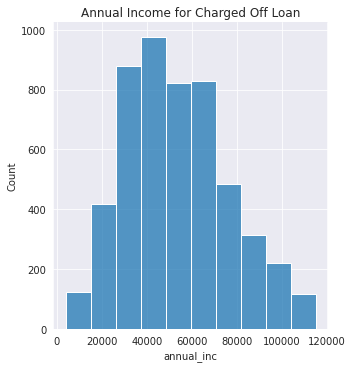

In [94]:
#  Analysis on Annual Income 
# Here we are plotting graph for people having loan status as "Charged Off against Annual Income "
plt.figure(figsize= (12,8))
sns.displot(df_normalised_loan.loc[(df_normalised_loan['loan_status'] =="Charged Off")]['annual_inc'], bins=10)
plt.title("Annual Income for Charged Off Loan")
plt.show()

# Observation
# People with Annual Income around 40000 have higher number of loans defaulted

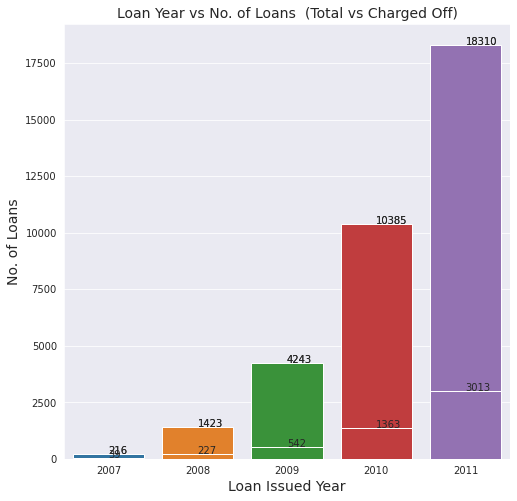

In [92]:
#Analysis on Loan Month
#Here we identify how every year loan issuance vs defaulter performed. Is there a significant increase in the number of defaulter with every year ?
plt.figure(figsize= (8,8))
PlotAttribute(df_normalised_loan, 'issue_year','Loan Year vs No. of Loans', 'Loan Issued Year', 'No. of Loans')
PlotAttribute(df_normalised_loan.loc[(df_normalised_loan['loan_status'] =="Charged Off")], 'issue_year','Loan Year vs No. of Loans  (Total vs Charged Off)', 'Loan Issued Year', 'No. of Loans')
plt.show()


# Observation
# There is a significant increase in the no. of loans issued over the year and the defaulters too.

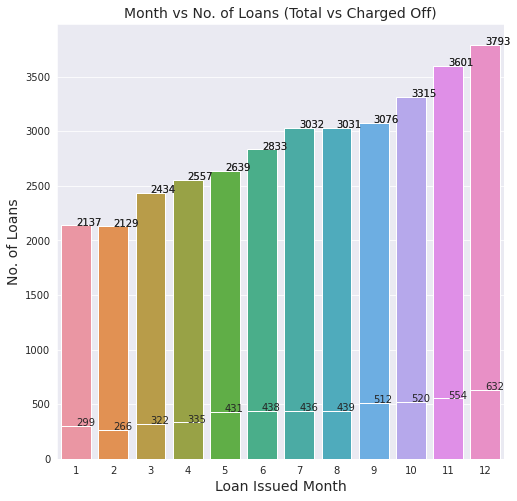

In [93]:
#Analysis on Loan Month
#Here we identify how  trend for issuance of loan per month. do we see any specific trend here? 
plt.figure(figsize= (8,8))
PlotAttribute(df_normalised_loan, 'issue_month', 'Year', 'Loan Issued Year', 'No. of Loans')
PlotAttribute(df_normalised_loan.loc[(df_normalised_loan['loan_status'] =="Charged Off")], 'issue_month', 'Month vs No. of Loans (Total vs Charged Off)', 'Loan Issued Month', 'No. of Loans')
plt.show()

# Observation
# There is a  increase in the no. of loans issued towards end of the year

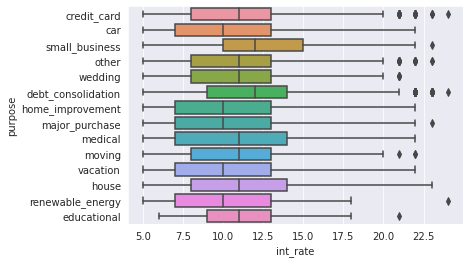

In [95]:
#  Aanlysis - Interest Rate and Purpose
#Here we are identifying which purpose attract more interest_rate. As we already know high interest rate then there is a high chance of defaulting.
sns.boxplot(data=df_normalised_loan,x="int_rate",y="purpose")
plt.show()
#Summary
#1. There is higher interest rate for the small business, debt consolidation ,medical & house.
#2. Debt COnsolidation have higher interest rate as well from previous graph they have higher charge off.

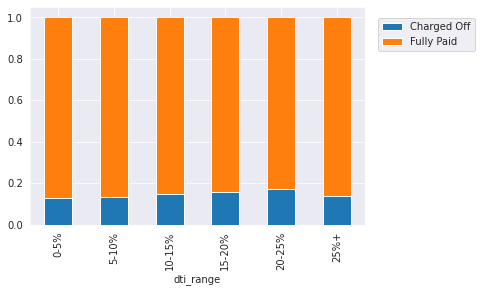

In [96]:
# create stacked bar chart for Debt To Income Range
df_normalised_loan.groupby('dti_range')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.legend(loc=(1.04, 0.8))
plt.show()

# Observation
# Defaulters are within 20% across all DTI Range

In [97]:
# Check for Charged Off % across the loan amount
df_normalised_loan.groupby('loan_amt_range')['loan_status'].value_counts(normalize=True).unstack('loan_status')

loan_status,Charged Off,Fully Paid
loan_amt_range,,
Less than 5K,0.15,0.85
5K to 8K,0.13,0.87
8K to 13K,0.13,0.87
13K +,0.18,0.82


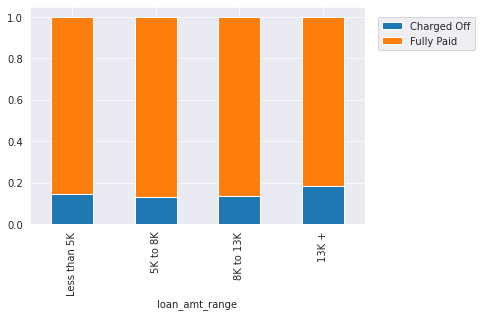

In [98]:
# create stacked bar chart for Debt To Income Range
df_normalised_loan.groupby('loan_amt_range')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.legend(loc=(1.04, 0.8))
plt.show()

# Observation
# Defaulters looks high in both of loan amount range i.e. lower (<5K) and higher end (>13K)

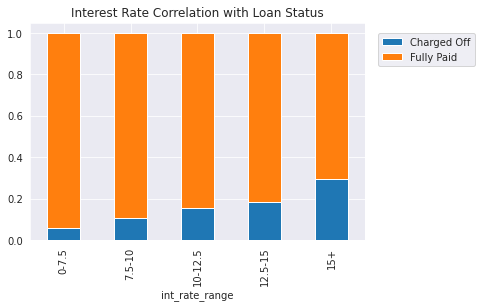

In [99]:
# create stacked bar chart for Debt To Income Range
# Here how interest_rate are correlated to the loan_status
df_normalised_loan.groupby('int_rate_range')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.legend(loc=(1.04, 0.8))
plt.title("Interest Rate Correlation with Loan Status")
plt.show()

# Observation
# Defaulters increase as the Interest Rate increases

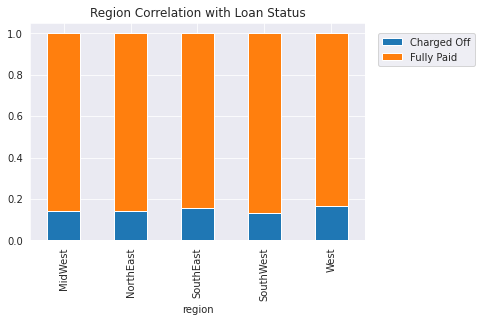

In [100]:
# create stacked bar chart for Region
# Here how each region contribute to loan deafult. identifying if there is a specific region that is causing more default than other.
df_normalised_loan.groupby('region')['loan_status'].value_counts(normalize=True).unstack('loan_status').plot.bar(stacked=True)
plt.legend(loc=(1.04, 0.8))
plt.title("Region Correlation with Loan Status")
plt.show()

# Observation
# Charged Off percentage is within 20 % across all regions
# highest Charged off happen in the West & SouthEast region.

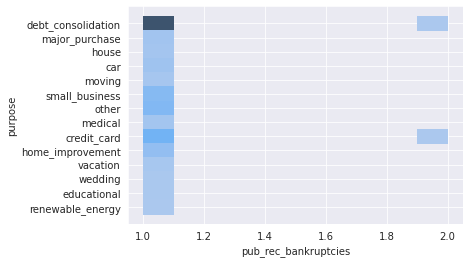

In [101]:
# Plot Loan purpose and Bankruptcies to identify relationship
sns.histplot(data=df_normalised_loan[(df_normalised_loan.pub_rec_bankruptcies > 0) & (df_normalised_loan.loan_status == "Charged Off")],
             y="purpose",x="pub_rec_bankruptcies")
plt.show()
#Summary
# People with bankrupcies majorly took loan for debt_consolidation & credit card

In [102]:
# Custom Method to get charged off percentage
def GetChargedOffPercentage(df_dataset, attribute_list):
  lst_attribute_list = list(attribute_list.split(","))
  df_attribute_status = df_dataset.groupby(lst_attribute_list).loan_status.count().unstack().fillna(0).reset_index()
  df_attribute_status['Total'] = df_attribute_status['Charged Off'] + df_attribute_status['Fully Paid'] 
  df_attribute_status['Chargedoff%'] = (df_attribute_status['Charged Off'] / df_attribute_status['Total']) * 100
  return df_attribute_status

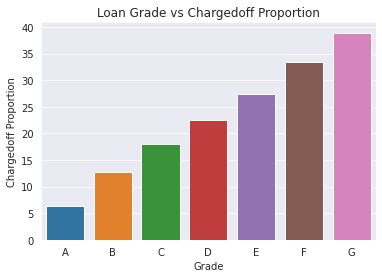

In [103]:
# Find the Charged Off Loan % for various loan Grades
df_grade_status = GetChargedOffPercentage(df_normalised_loan, 'grade,loan_status')
#df_grade_status.sort_values('Chargedoff%', ascending=False)
chrt=sns.barplot(x='grade', y='Chargedoff%', data=df_grade_status)
chrt.set_xlabel('Grade')
chrt.set_ylabel('Chargedoff Proportion')
chrt.set_title('Loan Grade vs Chargedoff Proportion')
plt.show()

# Observation
# Grade G tops the Charged Off percentage

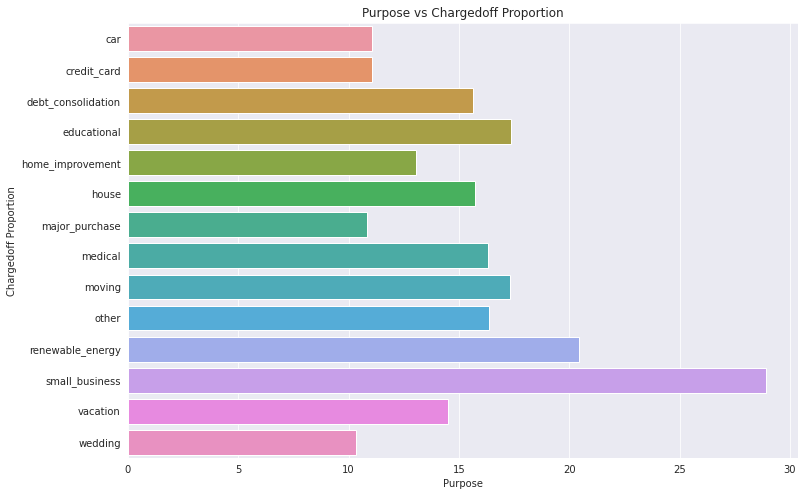

In [104]:
# Find the Charged Off Loan % for various loan purposes
df_grade_status = GetChargedOffPercentage(df_normalised_loan, 'purpose,loan_status')
df_grade_status.sort_values('Chargedoff%', ascending=False)

fig, chrt = plt.subplots(figsize=(12, 8))
chrt.set_title('Purpose vs Chargedoff Proportion')
chrt=sns.barplot(y='purpose', x='Chargedoff%', data=df_grade_status)
chrt.set_xlabel('Purpose')
chrt.set_ylabel('Chargedoff Proportion')
plt.show()

# Observation
# Small business has higher number of Charged Off loans and earlier we noticed this has higher interest rates as well.

***Multivariate Analysis***

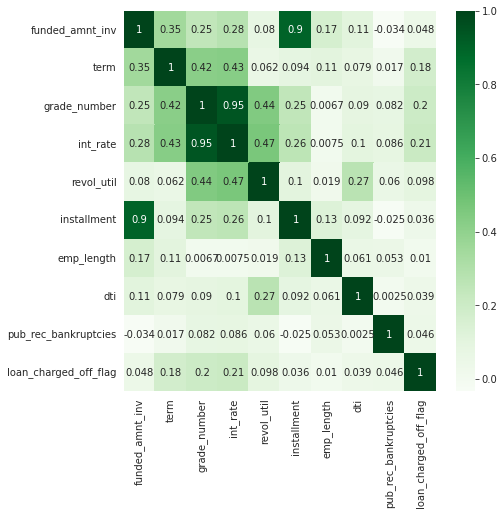

In [105]:
# Converting Categorical variables like loan_status and grade to numerical variable to find the correalation with other numerical variables.
# Convert Grade and Loan Status to numeric to be able to include in the correlation analysis
grade_dict = {"A" : 1, "B" : 2, "C": 3, "D" : 4, "E": 5, "F" : 6, "G": 7}
df_normalised_loan['grade_number'] = df_normalised_loan.grade.map(lambda x: grade_dict.get(x))

df_normalised_loan['loan_charged_off_flag'] = df_normalised_loan.loan_status.apply(lambda status: 1 if status=="Charged Off" else 0 )

plt.figure(figsize= (7,7))
df_normalised_loan_subset = df_normalised_loan[["funded_amnt_inv","term","grade_number","int_rate","revol_util","installment","emp_length","dti","pub_rec_bankruptcies","loan_charged_off_flag"]]
sns.heatmap(df_normalised_loan_subset.corr(), cmap="Greens",annot=True)
plt.show()

# Observation
# loan_charge off have slightly posistive correlation with term & interest_rate 
# term have positive correlation with funded amount & interest rate
# Grade has positive correlation with Interest Rate, Term and Loan Status
# Revolving line utilization rate has positive correlation with Grade, Interest Rate and Debt to Income